In [26]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns
import sketch
import calplot

from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
data = load_google_sheet()

2024-03-25 00:15:06.824 | INFO     | friendsfamilytest.utils:wrapper:100 - Function 'load_google_sheet' ⚡️1.898790 sec


In [28]:
data.tail()

,time,rating,free_text,do_better,surgery
3706,2024-03-24 20:27:48,Extremely likely,"Always as expected, I’m satisfied with my GP p...",,Emperor's Gate Surgery
3707,2024-03-24 23:05:39,Extremely likely,Perfect,,Emperor's Gate Surgery
3708,2024-03-24 23:13:59,Extremely likely,"Love the surgery no complaints, all staff frie...",More oppertunity to hear what the practice is ...,Earls Court Surgery
3709,2024-03-24 23:31:38,Extremely likely,"Sorry, I’m not good at using websites but over...",,Earls Court Medical Centre
3710,2024-03-25 00:10:28,Extremely likely,"Very happy with my surgery, thank you",,Earls Court Surgery


In [29]:
data.duplicated().sum()

4

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       3711 non-null   datetime64[ns]
 1   rating     3711 non-null   object        
 2   free_text  3711 non-null   object        
 3   do_better  3711 non-null   object        
 4   surgery    3711 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 145.1+ KB


In [32]:
data.sort_values(by='time', inplace=True)

In [33]:
data

,time,rating,free_text,do_better,surgery
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,Earls Court Surgery
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,Earls Court Surgery
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,Earls Court Surgery
3,2023-07-13 15:30:10,Extremely likely,Dr E was extremely nice,the receptionist was very unkind,Earls Court Surgery
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,Earls Court Surgery
...,...,...,...,...,...
3706,2024-03-24 20:27:48,Extremely likely,"Always as expected, I’m satisfied with my GP p...",,Emperor's Gate Surgery
3707,2024-03-24 23:05:39,Extremely likely,Perfect,,Emperor's Gate Surgery
3708,2024-03-24 23:13:59,Extremely likely,"Love the surgery no complaints, all staff frie...",More oppertunity to hear what the practice is ...,Earls Court Surgery
3709,2024-03-24 23:31:38,Extremely likely,"Sorry, I’m not good at using websites but over...",,Earls Court Medical Centre


In [ ]:
for index, row in data.iterrows():
    print(row['free_text'])
    print(index)

In [2]:
data2 = pd.read_csv('../friendsfamilytest/data/data.csv')

In [3]:
data2.head()

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels,feedback_labels
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",NaN,Earls Court Surgery,13.0,3,5.0,NaN,NaN,positive,0.909031,NaN,Overall Patient Satisfaction
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,Earls Court Surgery,4.0,0,5.0,NaN,NaN,positive,0.925523,NaN,Patient Privacy and Confidentiality
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,Earls Court Surgery,8.0,5,5.0,NaN,NaN,positive,0.971687,Overall Patient Satisfaction,Medical Staff Competence
3,2023-07-13 15:30:10,Extremely likely,Dr [PERSON] was extremely nice,the receptionist was very unkind,Earls Court Surgery,5.0,5,5.0,NaN,NaN,positive,0.982086,Reception Staff Interaction,Patient-Doctor Communication
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,Earls Court Surgery,44.0,6,5.0,NaN,NaN,neutral,0.755115,Overall Patient Satisfaction,Follow-Up and Continuity of Care


In [16]:
data2.columns
data2['time'] = pd.to_datetime(data2['time'])

In [17]:
data2.drop(columns=['polarity', 'subjectivity', 'neg', 'neu', 'pos', 'compound'], inplace=True)

In [18]:
# Group by sentiment and resample by week, then calculate the mean sentiment_score
weekly_sentiment_means_adjusted = data2.groupby('sentiment').resample('W')['sentiment_score'].mean().unstack(level=0)

# Fill any possible NaN values with 0 (assuming no sentiment means neutral)
weekly_sentiment_means_adjusted = weekly_sentiment_means_adjusted.fillna(0)

weekly_sentiment_means_adjusted.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [19]:
import matplotlib
matplotlib.use('TkAgg')  # Use 'Agg', 'TkAgg', 'Qt4Agg', 'Qt5Agg', etc., depending on your preferences and environment
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

# Melting the DataFrame to long format for easier plotting with seaborn
data_long = weekly_sentiment_means_adjusted.reset_index().melt(id_vars='time', var_name='Sentiment', value_name='Average Score')

# Creating the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_long, x='time', y='Average Score', hue='Sentiment', marker='o')

plt.title('Weekly Sentiment Score Averages', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

NameError: name 'weekly_sentiment_means_adjusted' is not defined

In [21]:
data2_weekly

NameError: name 'data2_weekly' is not defined

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
def check_column_length(dataframe):
    short_phrases = []

    # Iterate over each entry in the 'do_better' column
    for entry in dataframe['free_text']:
        # Count the number of words in the entry
        word_count = len(str(entry).split())

        # Check if the word count is less than 5
        if word_count < 30:
            short_phrases.append(entry)

    # Print the list of entries with fewer than 5 words
    print("Entries with fewer than 5 words:", short_phrases)

# Example usage
# Assuming 'df' is your DataFrame and it has a column named 'do_better'
# df = pd.DataFrame({'do_better': ['Improve communication', 'Be more timely', 'Feedback', 'Enhance portal usability', 'Listen more']})
# check_do_better_column(df)

In [ ]:
check_column_length(data)

In [ ]:
def check_column_length(dataframe, column_name, word_count_length):
    # Iterate over each entry in the specified column
    for index, entry in enumerate(dataframe[column_name]):
        # Count the number of words in the entry
        word_count = len(str(entry).split())

        # Check if the word count is less than the specified limit
        if word_count < word_count_length:
            # Replace with NaN if the condition is met
            dataframe.at[index, column_name] = pd.nan

    return dataframe

In [ ]:
check_column_length(data2, 'do_better', 4)

In [ ]:
check_column_length(data2, 'free_text', 2)

In [11]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')

In [ ]:
data2.head(30)

In [ ]:
import numpy as np

In [ ]:
data2.loc[data2['do_better_len'] < 5, 'do_better'] = np.nan
data2.loc[data2['do_better_len'] < 5, 'improvement_labels'] = np.nan

In [ ]:
data2.head(10)

In [ ]:
data2.loc[data2['free_text_len'] < 3, 'free_text'] = np.nan
data2.loc[data2['free_text_len'] < 3, 'feedback_labels'] = np.nan

In [ ]:
data2.head(30)

In [ ]:
data2.shape

In [ ]:
# Saving the indexes corresponding to rows
boolean_mask = (data2['free_text_len']> 10)

# Applying the boolean filteraing
data3 = data2[boolean_mask].reset_index(drop=True)

In [ ]:
data3

In [ ]:
data3.columns

In [ ]:
data3[['time', 'rating', 'free_text', 'do_better', 'surgery', 'free_text_len',
       'do_better_len', 'rating_score', 'classif', 'classif_scores',
       'sentiment', 'sentiment_score', 'improvement_labels', 'polarity',
       'subjectivity', 'feedback_labels']]

In [ ]:
data3.drop(columns=['neg', 'neu', 'pos', 'compound'], inplace=True)

In [ ]:
data3

In [ ]:
import sketch
data3.sketch.ask("WHat is the average Neutral sentiment score?")

In [ ]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')

In [ ]:
data

In [ ]:
data = clean_data(data)

In [ ]:
data.head(30)

In [ ]:
data.to_csv('data.csv', index=False)

In [7]:
calplot.calplot(data2['sentiment_score'], cmap='YlGn', edgecolor='black')

AttributeError: 'RangeIndex' object has no attribute 'year'

In [8]:
import subprocess

result = subprocess.run(["python", "friendsfamilytest/data.py"], shell=True, capture_output=True, text=True)

print(result.stdout)


In [13]:
data['time'] = pd.to_datetime(data['time'])

In [14]:
monthly_count_filtered = data.resample("M", on="time").size()

In [15]:
monthly_count_filtered

time
2023-07-31     102
2023-08-31      99
2023-09-30     109
2023-10-31      99
2023-11-30      42
2023-12-31     152
2024-01-31      76
2024-02-29    1876
2024-03-31    1024
Freq: M, dtype: int64

In [16]:
monthly_count_filtered_df = monthly_count_filtered.reset_index()

In [17]:
monthly_count_filtered_df

,time,0
0,2023-07-31,102
1,2023-08-31,99
2,2023-09-30,109
3,2023-10-31,99
4,2023-11-30,42
5,2023-12-31,152
6,2024-01-31,76
7,2024-02-29,1876
8,2024-03-31,1024


In [18]:
monthly_count_filtered_df.columns = ["Month", "Monthly Count"]

In [19]:
monthly_count_filtered_df

,Month,Monthly Count
0,2023-07-31,102
1,2023-08-31,99
2,2023-09-30,109
3,2023-10-31,99
4,2023-11-30,42
5,2023-12-31,152
6,2024-01-31,76
7,2024-02-29,1876
8,2024-03-31,1024


In [20]:
monthly_count_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          9 non-null      datetime64[ns]
 1   Monthly Count  9 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 272.0 bytes


In [21]:
monthly_count_filtered_df["Month"] = pd.to_datetime(
    monthly_count_filtered_df["Month"]
)

In [22]:
monthly_count_filtered_df

,Month,Monthly Count
0,2023-07-31,102
1,2023-08-31,99
2,2023-09-30,109
3,2023-10-31,99
4,2023-11-30,42
5,2023-12-31,152
6,2024-01-31,76
7,2024-02-29,1876
8,2024-03-31,1024


In [23]:
monthly_count_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          9 non-null      datetime64[ns]
 1   Monthly Count  9 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 272.0 bytes


In [ ]:
       
# Create the figure and the bar plot
            fig, ax = plt.subplots(figsize=(12, 5))
            sns.barplot(
                data=monthly_count_filtered_df, x="Month", y="Monthly Count", color="#aabd3b"
            )

            # Set grid, spines and annotations as before
            ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
            ax.xaxis.grid(False)
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_visible(False)

            # Annotate bars with the height (monthly count)
            for p in ax.patches:
                ax.annotate(
                    f"{int(p.get_height())}",
                    (p.get_x() + p.get_width() / 2.0, p.get_height()),
                    ha="center",
                    va="center",
                    xytext=(0, 10),
                    textcoords="offset points",
                )

            # Set title to the right
            ax_title = ax.set_title("Monthly FFT Responses - Brompton Health PCN", loc="right")
            ax_title.set_position((1.02, 1))  # Adjust title position

            # Redraw the figure to ensure the formatter is applied
            fig.canvas.draw()

            # Remove xlabel as it's redundant with the dates
            plt.xlabel("")

            # Apply tight layout and display plot
            plt.tight_layout()
            st.pyplot(fig)

In [25]:
import pandas as pd

# Assume you have a pandas Series with datetime64[ns] dtype
dates_with_time = pd.Series(pd.date_range("2024-01-01 12:00:00", periods=3, freq="H"), name="DateTime")

# Convert to date-only format
dates_only = dates_with_time.dt.date

# Check the result
dates_only.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3 entries, 0 to 2
Series name: DateTime
Non-Null Count  Dtype 
--------------  ----- 
3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes


In [2]:
%pwd

'/Users/janduplessis/code/janduplessis883/friends-and-family-test-analysis/notebooks'

In [3]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')

In [5]:
data.head()

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels,feedback_labels
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",NaN,Earls Court Surgery,13.0,3,5.0,NaN,NaN,positive,0.909031,NaN,Overall Patient Satisfaction
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,Earls Court Surgery,4.0,0,5.0,NaN,NaN,positive,0.925523,NaN,Patient Privacy and Confidentiality
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,Earls Court Surgery,8.0,5,5.0,NaN,NaN,positive,0.971687,Overall Patient Satisfaction,Medical Staff Competence
3,2023-07-13 15:30:10,Extremely likely,Dr [PERSON] was extremely nice,the receptionist was very unkind,Earls Court Surgery,5.0,5,5.0,NaN,NaN,positive,0.982086,Reception Staff Interaction,Patient-Doctor Communication
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,Earls Court Surgery,44.0,6,5.0,NaN,NaN,neutral,0.755115,Overall Patient Satisfaction,Follow-Up and Continuity of Care


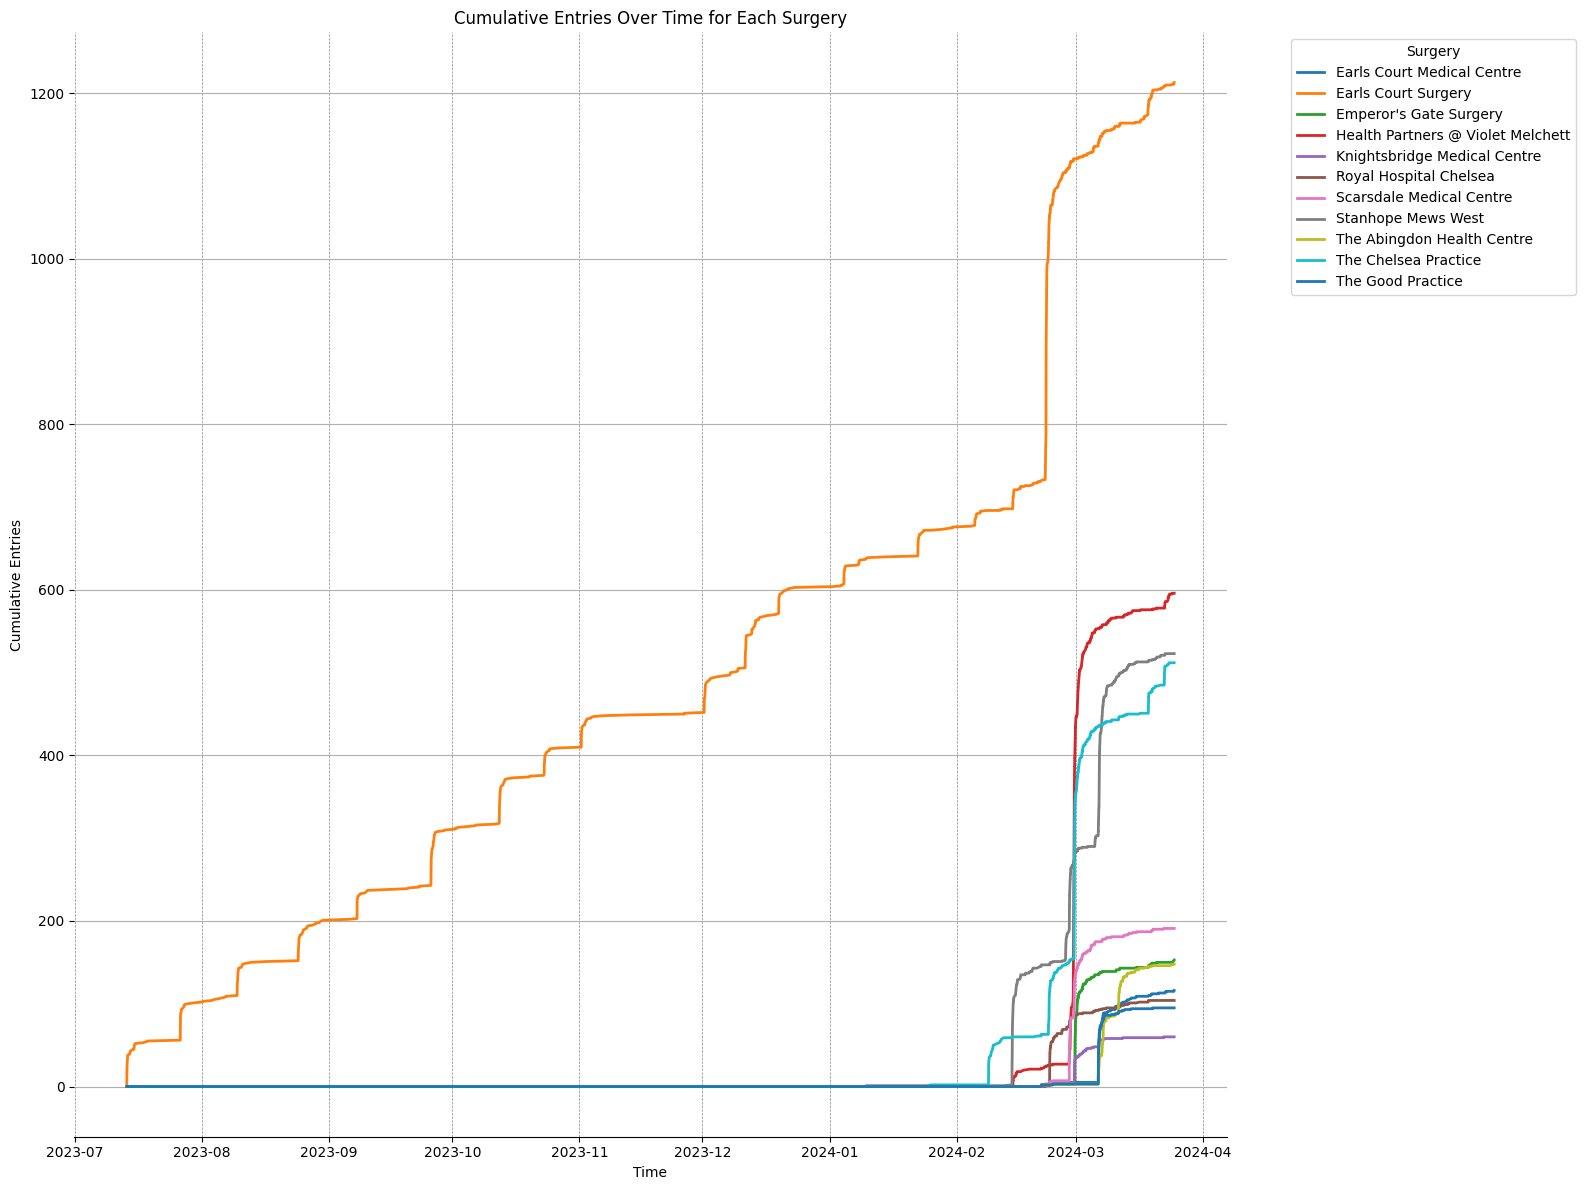

In [48]:
data_sorted = data.sort_values('time')

# Group by 'surgery' and 'time', then calculate the cumulative count
data_sorted['cumulative_count'] = data_sorted.groupby('surgery').cumcount() + 1

# Pivot the table to have surgeries as columns and their cumulative counts as values
data_pivot = data_sorted.pivot_table(index='time', columns='surgery', values='cumulative_count', aggfunc='first')

# Forward fill the NaN values to maintain the cumulative nature
data_pivot_filled = data_pivot.fillna(method='ffill').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(16, 12))
for column in data_pivot_filled.columns:
    
    plt.plot(data_pivot_filled.index, data_pivot_filled[column], label=column, linewidth=2)

ax.yaxis.grid(False)
ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.title('Cumulative Entries Over Time for Each Surgery')
plt.xlabel('Time')
plt.ylabel('Cumulative Entries')
plt.legend(title='Surgery', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()